<a href="https://colab.research.google.com/github/cabbi120101/TIL/blob/master/%EA%B3%B5%EB%AA%A8%EC%A0%84%EA%B3%B5%EB%B6%80/%EC%8B%9C%EA%B0%81%ED%99%94%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5(%EC%A7%80%ED%95%98%EC%B2%A0%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B7%B8%EB%9E%98%ED%94%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [73]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import re
import datetime 

In [74]:
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic') 

In [75]:
# fm = mp.font_manager.FontManager()
# # 한글 지원하는 폰트명으로 재할당
# # plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rc('font', family='Malgun Gothic')

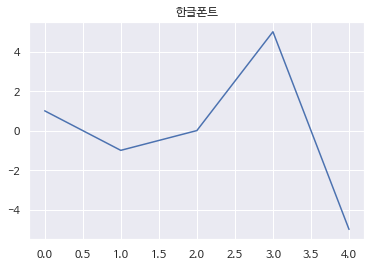

In [76]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# "Malgun Gothic"
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

# 한글폰트 설정 확인을 합니다.

pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")

In [77]:
# # 시각화 모듈 임포트
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib
# from matplotlib import font_manager, rc

# # colab 내 그래프를 바로 그리기 위한 설정
# %matplotlib inline

# # unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
# plt.rcParams['axes.unicode_minus'] = False

# # font 적용
# plt.rc('font', family = 'NanumBarunGothic')

# # ggplot 으로 그래프 스타일 설정
# plt.style.use('ggplot')

# # 레티나 설정 : 글자가 흐릿하게 보이는 현상 방지
# %config InlineBackend.figure_format = 'retina'

In [78]:
# fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
#합친 데이터 가져오기
data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/대중교통관련/sub_all_all.csv'
df = pd.read_csv(data_file)
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20210601,3호선,신사,28955,30583,20210604
1,20210601,3호선,잠원,4780,4656,20210604
2,20210601,3호선,고속터미널,33986,32532,20210604
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604


In [81]:
# 역명에 gwalho 가 있어서 괄호를 찾은 후 앞 값만 괄호빠진 역명에 넣기
def gwalho_nono(some_str):
    if '(' in some_str:
       return some_str[:some_str.index('(')]
    else:
       return some_str

df["괄호빠진역명"] = df["역명"].apply(gwalho_nono)

In [82]:
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명
0,20210601,3호선,신사,28955,30583,20210604,신사
1,20210601,3호선,잠원,4780,4656,20210604,잠원
2,20210601,3호선,고속터미널,33986,32532,20210604,고속터미널
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,교대
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,남부터미널
...,...,...,...,...,...,...,...
434343,20190831,6호선,월곡(동덕여대),9904,9290,20190903,월곡
434344,20190831,6호선,상월곡(한국과학기술연구원),5028,4277,20190903,상월곡
434345,20190831,6호선,돌곶이,7175,6552,20190903,돌곶이
434346,20190831,6호선,석계,11241,10890,20190903,석계


In [83]:
# 역 주소만 가진 데이터를 가져옴, '역명'을 괄호빠진 역명으로 바

data_file = '/content/drive/MyDrive/Colab Notebooks/코로나관련/대중교통관련/지하철 데이터/SUBWAY_ALL - SUBWAY_ALL.csv'
df2 = pd.read_csv(data_file, )
df2.rename(columns={'역명':'괄호빠진역명'}, inplace=True)
df2.head()

,Unnamed: 0,호선,괄호빠진역명,역주소,구
0,0,1,서울역,서울특별시 중구 세종대로 지하 2 (남대문로 5가),중구
1,1,1,시청,서울특별시 중구 세종대로 지하 101 (정동),중구
2,2,1,종각,서울특별시 종로구 종로 지하 55 (종로1가),종로구
3,3,1,종로3가,서울특별시 종로구 종로 지하 129 (종로3가),종로구
4,4,1,종로5가,서울특별시 종로구 종로 지하 216 (종로5가),종로구


In [84]:
# 괄호빠진역명이 공통으로 있음으로 df,df2를 합침
big_df = pd.merge(df, df2, how="left", on="괄호빠진역명")
big_df


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구
0,20210601,3호선,신사,28955,30583,20210604,신사,79.0,3.0,서울특별시 강남구 도산대로 지하 102 (신사동),강남구
1,20210601,3호선,잠원,4780,4656,20210604,잠원,80.0,3.0,서울특별시 서초구 잠원로 4길 지하 46 (잠원동),서초구
2,20210601,3호선,고속터미널,33986,32532,20210604,고속터미널,81.0,3.0,서울특별시 서초구 신반포로 지하 188 (반포동),서초구
3,20210601,3호선,고속터미널,33986,32532,20210604,고속터미널,236.0,7.0,서울특별시 서초구 신반포로 지하 188 (반포동),서초구
4,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,교대,33.0,2.0,서울특별시 서초구 서초대로 지하 294 (서초동),서초구
...,...,...,...,...,...,...,...,...,...,...,...
498781,20190831,6호선,상월곡(한국과학기술연구원),5028,4277,20190903,상월곡,204.0,6.0,서울특별시 성북구 화랑로 지하157 (상월곡동),성북구
498782,20190831,6호선,돌곶이,7175,6552,20190903,돌곶이,205.0,6.0,서울특별시 성북구 화랑로 지하243 (석관동),성북구
498783,20190831,6호선,석계,11241,10890,20190903,석계,206.0,6.0,서울특별시 노원구 화랑로 지하347-1 (월계동),노원구
498784,20190831,6호선,태릉입구,5097,5455,20190903,태릉입구,207.0,6.0,서울특별시 노원구 동일로 지하992-1 (공릉동),노원구


In [85]:
# null값 확인, 결과 서울 이외의 지하철 역
big_df[big_df['구'].isnull()]

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구
76,20210601,5호선,강일,3156,3357,20210604,강일,NaN,NaN,NaN,NaN
77,20210601,5호선,미사,14867,14469,20210604,미사,NaN,NaN,NaN,NaN
78,20210601,5호선,하남풍산,3952,3985,20210604,하남풍산,NaN,NaN,NaN,NaN
79,20210601,5호선,하남시청(덕풍·신장),4956,5005,20210604,하남시청,NaN,NaN,NaN,NaN
80,20210601,5호선,하남검단산,4565,4492,20210604,하남검단산,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
498669,20190831,경강선,신둔도예촌,1288,1224,20190903,신둔도예촌,NaN,NaN,NaN,NaN
498670,20190831,경강선,이천,3121,3263,20190903,이천,NaN,NaN,NaN,NaN
498671,20190831,경강선,부발,1929,1659,20190903,부발,NaN,NaN,NaN,NaN
498672,20190831,경강선,세종대왕릉,394,436,20190903,세종대왕릉,NaN,NaN,NaN,NaN


In [86]:
# 사용일자 기준으로 정렬
big_df = big_df.sort_values(by=['사용일자'], ascending=[True])
big_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구
271667,20190701,6호선,버티고개,2735,2636,20190704,버티고개,194.0,6.0,서울특별시 중구 다산로 지하38 (신당동),중구
271607,20190701,5호선,을지로4가,6480,6703,20190704,을지로4가,14.0,2.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구
271608,20190701,5호선,을지로4가,6480,6703,20190704,을지로4가,146.0,5.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구
271609,20190701,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,15.0,2.0,서울특별시 중구 을지로 지하 279 (을지로7가),중구
271610,20190701,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,108.0,4.0,서울특별시 중구 장충단로 지하 230 (광희동 2가),중구
...,...,...,...,...,...,...,...,...,...,...,...
20218,20210630,5호선,충정로(경기대입구),4928,5170,20210703,충정로,142.0,5.0,서울특별시 서대문구 충정로 28-1,서대문구
20219,20210630,5호선,애오개,7179,7173,20210703,애오개,141.0,5.0,서울특별시 마포구 마포대로 지하210 (아현동),마포구
20220,20210630,5호선,공덕,14749,15891,20210703,공덕,140.0,5.0,서울특별시 마포구 마포대로 지하100 (공덕동),마포구
20212,20210630,5호선,종로3가,12049,12078,20210703,종로3가,3.0,1.0,서울특별시 종로구 종로 지하 129 (종로3가),종로구


In [87]:
# 결측값 있는 행 삭제 및 확인
big_df=big_df.dropna(axis=0)
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304968 entries, 271667 to 20212
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   사용일자        304968 non-null  int64  
 1   노선명         304968 non-null  object 
 2   역명          304968 non-null  object 
 3   승차총승객수      304968 non-null  int64  
 4   하차총승객수      304968 non-null  int64  
 5   등록일자        304968 non-null  int64  
 6   괄호빠진역명      304968 non-null  object 
 7   Unnamed: 0  304968 non-null  float64
 8   호선          304968 non-null  float64
 9   역주소         304968 non-null  object 
 10  구           304968 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.9+ MB


In [88]:
# 아래 코드를 실행시키니 타입 에러 나서 사용일자 타입을 바꿔줌
big_df['사용일자'] = big_df['사용일자'].astype(str)
# big_df['연도'] = big_df['사용일자'].str[0:3]
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304968 entries, 271667 to 20212
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   사용일자        304968 non-null  object 
 1   노선명         304968 non-null  object 
 2   역명          304968 non-null  object 
 3   승차총승객수      304968 non-null  int64  
 4   하차총승객수      304968 non-null  int64  
 5   등록일자        304968 non-null  int64  
 6   괄호빠진역명      304968 non-null  object 
 7   Unnamed: 0  304968 non-null  float64
 8   호선          304968 non-null  float64
 9   역주소         304968 non-null  object 
 10  구           304968 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 27.9+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
# 사용일자 형식을 YYYYMMDD에서 YYYY-MM으로 바
from datetime import datetime

big_df['사용일자'] = [datetime.strptime(x, '%Y%m%d').strftime('%Y-%m-%d') for x in big_df.사용일자]
big_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구
271667,2019-07-01,6호선,버티고개,2735,2636,20190704,버티고개,194.0,6.0,서울특별시 중구 다산로 지하38 (신당동),중구
271607,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,14.0,2.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구
271608,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,146.0,5.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구
271609,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,15.0,2.0,서울특별시 중구 을지로 지하 279 (을지로7가),중구
271610,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,108.0,4.0,서울특별시 중구 장충단로 지하 230 (광희동 2가),중구


In [90]:
# 연도,월 컬럼도 만들기 
big_df['연도'] = big_df['사용일자'].str.split('-', expand=True)[0]
big_df['월'] = big_df['사용일자'].str.split('-', expand=True)[1]
big_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구,연도,월
271667,2019-07-01,6호선,버티고개,2735,2636,20190704,버티고개,194.0,6.0,서울특별시 중구 다산로 지하38 (신당동),중구,2019,07
271607,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,14.0,2.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구,2019,07
271608,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,146.0,5.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구,2019,07
271609,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,15.0,2.0,서울특별시 중구 을지로 지하 279 (을지로7가),중구,2019,07
271610,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,108.0,4.0,서울특별시 중구 장충단로 지하 230 (광희동 2가),중구,2019,07


In [91]:
big_df['사용일자'] = big_df['사용일자'].astype(str)
big_df.info()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 304968 entries, 271667 to 20212
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   사용일자        304968 non-null  object 
 1   노선명         304968 non-null  object 
 2   역명          304968 non-null  object 
 3   승차총승객수      304968 non-null  int64  
 4   하차총승객수      304968 non-null  int64  
 5   등록일자        304968 non-null  int64  
 6   괄호빠진역명      304968 non-null  object 
 7   Unnamed: 0  304968 non-null  float64
 8   호선          304968 non-null  float64
 9   역주소         304968 non-null  object 
 10  구           304968 non-null  object 
 11  연도          304968 non-null  object 
 12  월           304968 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 32.6+ MB


In [92]:
# 연도_월 추가
big_df['연도_월'] = big_df['사용일자'].apply(lambda some_str: some_str[:-3])
big_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구,연도,월,연도_월
271667,2019-07-01,6호선,버티고개,2735,2636,20190704,버티고개,194.0,6.0,서울특별시 중구 다산로 지하38 (신당동),중구,2019,07,2019-07
271607,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,14.0,2.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구,2019,07,2019-07
271608,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,146.0,5.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구,2019,07,2019-07
271609,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,15.0,2.0,서울특별시 중구 을지로 지하 279 (을지로7가),중구,2019,07,2019-07
271610,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,108.0,4.0,서울특별시 중구 장충단로 지하 230 (광희동 2가),중구,2019,07,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20217,2021-06-30,5호선,충정로(경기대입구),4928,5170,20210703,충정로,53.0,2.0,서울특별시 서대문구 서소문로 지하 17 (충정로3가),서대문구,2021,06,2021-06
20218,2021-06-30,5호선,충정로(경기대입구),4928,5170,20210703,충정로,142.0,5.0,서울특별시 서대문구 충정로 28-1,서대문구,2021,06,2021-06
20219,2021-06-30,5호선,애오개,7179,7173,20210703,애오개,141.0,5.0,서울특별시 마포구 마포대로 지하210 (아현동),마포구,2021,06,2021-06
20220,2021-06-30,5호선,공덕,14749,15891,20210703,공덕,140.0,5.0,서울특별시 마포구 마포대로 지하100 (공덕동),마포구,2021,06,2021-06


In [93]:
#서울 구만 가져오
big_df = big_df[big_df['구'].isin(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구'])]
big_df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명,Unnamed: 0,호선,역주소,구,연도,월,연도_월
271667,2019-07-01,6호선,버티고개,2735,2636,20190704,버티고개,194.0,6.0,서울특별시 중구 다산로 지하38 (신당동),중구,2019,07,2019-07
271607,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,14.0,2.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구,2019,07,2019-07
271608,2019-07-01,5호선,을지로4가,6480,6703,20190704,을지로4가,146.0,5.0,서울특별시 중구 을지로 지하 178 (을지로4가),중구,2019,07,2019-07
271609,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,15.0,2.0,서울특별시 중구 을지로 지하 279 (을지로7가),중구,2019,07,2019-07
271610,2019-07-01,5호선,동대문역사문화공원,3434,3959,20190704,동대문역사문화공원,108.0,4.0,서울특별시 중구 장충단로 지하 230 (광희동 2가),중구,2019,07,2019-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20217,2021-06-30,5호선,충정로(경기대입구),4928,5170,20210703,충정로,53.0,2.0,서울특별시 서대문구 서소문로 지하 17 (충정로3가),서대문구,2021,06,2021-06
20218,2021-06-30,5호선,충정로(경기대입구),4928,5170,20210703,충정로,142.0,5.0,서울특별시 서대문구 충정로 28-1,서대문구,2021,06,2021-06
20219,2021-06-30,5호선,애오개,7179,7173,20210703,애오개,141.0,5.0,서울특별시 마포구 마포대로 지하210 (아현동),마포구,2021,06,2021-06
20220,2021-06-30,5호선,공덕,14749,15891,20210703,공덕,140.0,5.0,서울특별시 마포구 마포대로 지하100 (공덕동),마포구,2021,06,2021-06


## 지하철 총 데이터 저장해보기

In [94]:
big_df.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자', '괄호빠진역명', 'Unnamed: 0',
       '호선', '역주소', '구', '연도', '월', '연도_월'],
      dtype='object')

In [95]:
# 필요없는 컬럼을 지우고 필요한 것들만 남
big_df=big_df.drop(['노선명', '역명',  '하차총승객수', '등록일자', '괄호빠진역명', 'Unnamed: 0',
       '호선', '역주소', ], axis=1)
big_df.head()

,사용일자,승차총승객수,구,연도,월,연도_월
271667,2019-07-01,2735,중구,2019,07,2019-07
271607,2019-07-01,6480,중구,2019,07,2019-07
271608,2019-07-01,6480,중구,2019,07,2019-07
271609,2019-07-01,3434,중구,2019,07,2019-07
271610,2019-07-01,3434,중구,2019,07,2019-07


In [96]:
# big_df = big_df.groupby(["사용일자","구", "연도", "월", "연도_월"])[["승차총승객수"]].median().reset_index()

In [97]:
big_df.to_csv('/content/data/지하철총데이터.csv', index=False)

In [98]:
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,괄호빠진역명
0,20210601,3호선,신사,28955,30583,20210604,신사
1,20210601,3호선,잠원,4780,4656,20210604,잠원
2,20210601,3호선,고속터미널,33986,32532,20210604,고속터미널
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,교대
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,남부터미널
...,...,...,...,...,...,...,...
434343,20190831,6호선,월곡(동덕여대),9904,9290,20190903,월곡
434344,20190831,6호선,상월곡(한국과학기술연구원),5028,4277,20190903,상월곡
434345,20190831,6호선,돌곶이,7175,6552,20190903,돌곶이
434346,20190831,6호선,석계,11241,10890,20190903,석계


In [99]:
#2019데이터만 가져옴
df_2019 = big_df.loc[big_df['연도'] == '2019']
df_2019.head()

,사용일자,승차총승객수,구,연도,월,연도_월
271667,2019-07-01,2735,중구,2019,07,2019-07
271607,2019-07-01,6480,중구,2019,07,2019-07
271608,2019-07-01,6480,중구,2019,07,2019-07
271609,2019-07-01,3434,중구,2019,07,2019-07
271610,2019-07-01,3434,중구,2019,07,2019-07


In [100]:
# 2020 데이터
df_2020 = big_df.loc[big_df['연도'] == '2020']
df_2020.head()

,사용일자,승차총승객수,구,연도,월,연도_월
374197,2020-01-01,5006,노원구,2020,01,2020-01
374200,2020-01-01,12243,동대문구,2020,01,2020-01
374201,2020-01-01,9318,성동구,2020,01,2020-01
374202,2020-01-01,9318,성동구,2020,01,2020-01
374204,2020-01-01,46,성동구,2020,01,2020-01


In [101]:
# 2020상반기
df_2020_ss = df_2020.loc[df_2020['사용일자'] <= '2020-06-30', :]
df_2020_ss.head()

,사용일자,승차총승객수,구,연도,월,연도_월
374197,2020-01-01,5006,노원구,2020,01,2020-01
374200,2020-01-01,12243,동대문구,2020,01,2020-01
374201,2020-01-01,9318,성동구,2020,01,2020-01
374202,2020-01-01,9318,성동구,2020,01,2020-01
374204,2020-01-01,46,성동구,2020,01,2020-01


In [102]:
#2020 하반기
df_2020_fw = df_2020.loc[df_2020['사용일자'] >= '2020-07-01', :]
df_2020_fw.head()

,사용일자,승차총승객수,구,연도,월,연도_월
209336,2020-07-01,6087,서초구,2020,07,2020-07
209337,2020-07-01,38501,서초구,2020,07,2020-07
208862,2020-07-01,14424,광진구,2020,07,2020-07
209106,2020-07-01,13483,동대문구,2020,07,2020-07
209109,2020-07-01,8689,노원구,2020,07,2020-07


In [103]:
# 2021 데이터
df_2021 = big_df.loc[big_df['연도'] == '2021']
df_2021.head()

,사용일자,승차총승객수,구,연도,월,연도_월
103683,2021-01-01,944,구로구,2021,01,2021-01
103684,2021-01-01,2502,영등포구,2021,01,2021-01
103686,2021-01-01,2239,금천구,2021,01,2021-01
103677,2021-01-01,1363,용산구,2021,01,2021-01
103657,2021-01-01,1951,송파구,2021,01,2021-01


In [104]:
# ss2021 = df_2021[['구','승차총승객수']].groupby('구').sum()
# ss2021.sort_values(by=['승차총승객수'], axis=0, ascending=False)


## 5구로 나누는 함수!

In [138]:
def set_five(row,value):
    return value[row]

five_gu = {'강남구':'강남구','강동구':'강남구','송파구':'강남구','서초구':'강남구',
           '동작구':'강서구','관악구':'강서구','금천구':'강서구','영등포구':'강서구','양천구':'강서구','구로구':'강서구','강서구':'강서구',
           '중랑구':'중랑구','광진구':'중랑구','동대문구':'중랑구','성동구':'중랑구',
           '은평구':'중구','종로구':'중구','서대문구':'중구','마포구':'중구','용산구':'중구','중구':'중구',
           '도봉구':'강북구','강북구':'강북구','성북구':'강북구','노원구':'강북구'
           }


In [142]:
df_2019['오구']=df_2019['구'].apply(set_five, args=(five_gu, ))

df_2019.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,사용일자,승차총승객수,구,연도,월,연도_월,오구
271667,2019-07-01,2735,중구,2019,07,2019-07,중구
271607,2019-07-01,6480,중구,2019,07,2019-07,중구
271608,2019-07-01,6480,중구,2019,07,2019-07,중구
271609,2019-07-01,3434,중구,2019,07,2019-07,중구
271610,2019-07-01,3434,중구,2019,07,2019-07,중구


In [143]:
df_2020_ss['오구']=df_2020_ss['구'].apply(set_five, args=(five_gu, ))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [144]:
df_2020_fw['오구']=df_2020_fw['구'].apply(set_five, args=(five_gu, ))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
df_2021['오구']=df_2021['구'].apply(set_five, args=(five_gu, ))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 막대그래프

In [105]:
# legend 위치 조정 'best'=0,'upper right'=1,uppercenter=9,lowercenter=8

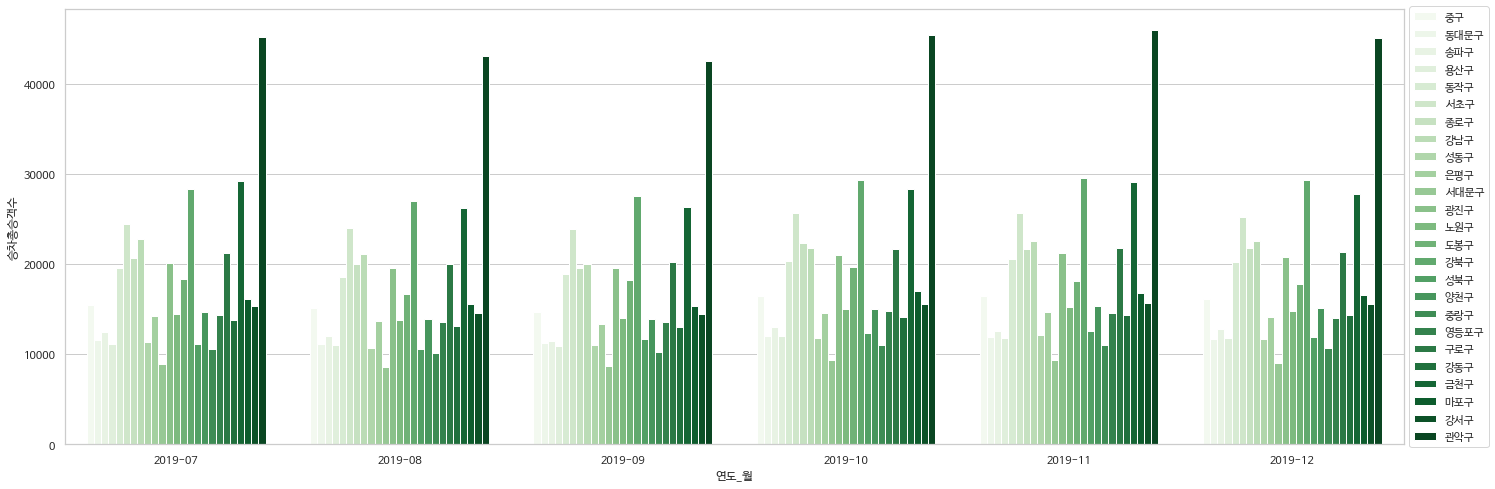

In [106]:
#2019년승차자 흐름 보기
# sns.set_style('whitegrid')
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수',
    hue='구',
    palette = 'Greens',
    data=df_2019.sort_values(['연도_월']),
    ci=None
)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
#그래프 저장
plt.savefig('/content/data/2019승차자.png',dpi=100)
plt.show()

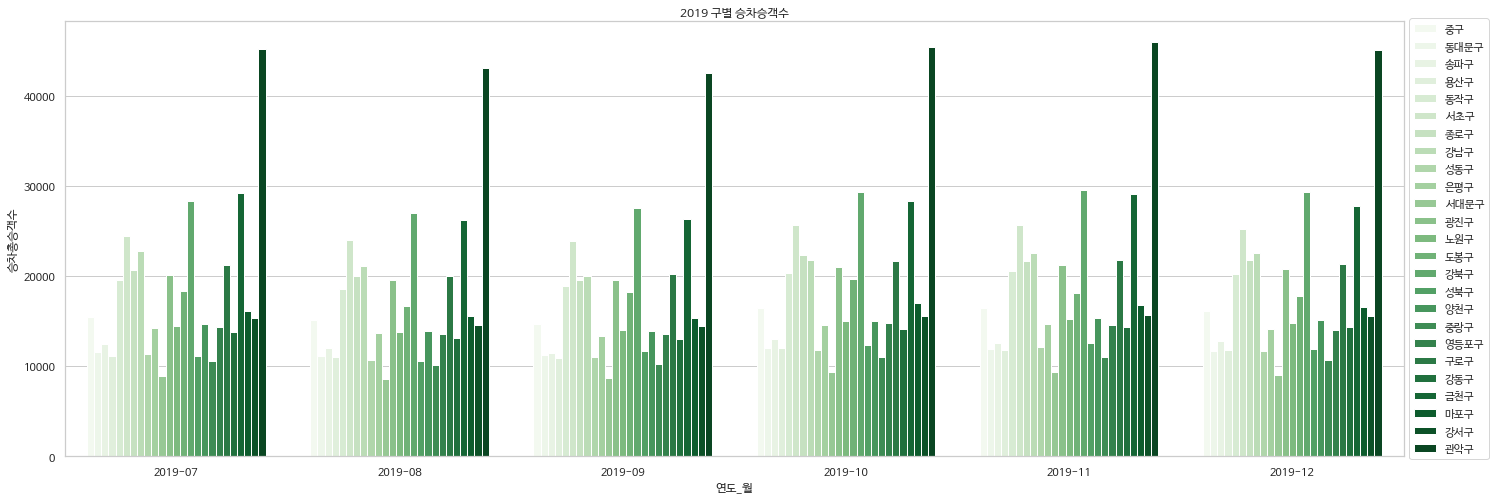

In [107]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="구", 
    data=df_2019.sort_values(['연도_월']),
    palette = 'Greens',
    ci=None
    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2019 구별 승차승객수")
plt.savefig('/content/data/2019구별승차자_막대그래프.png',dpi=100)
plt.show()

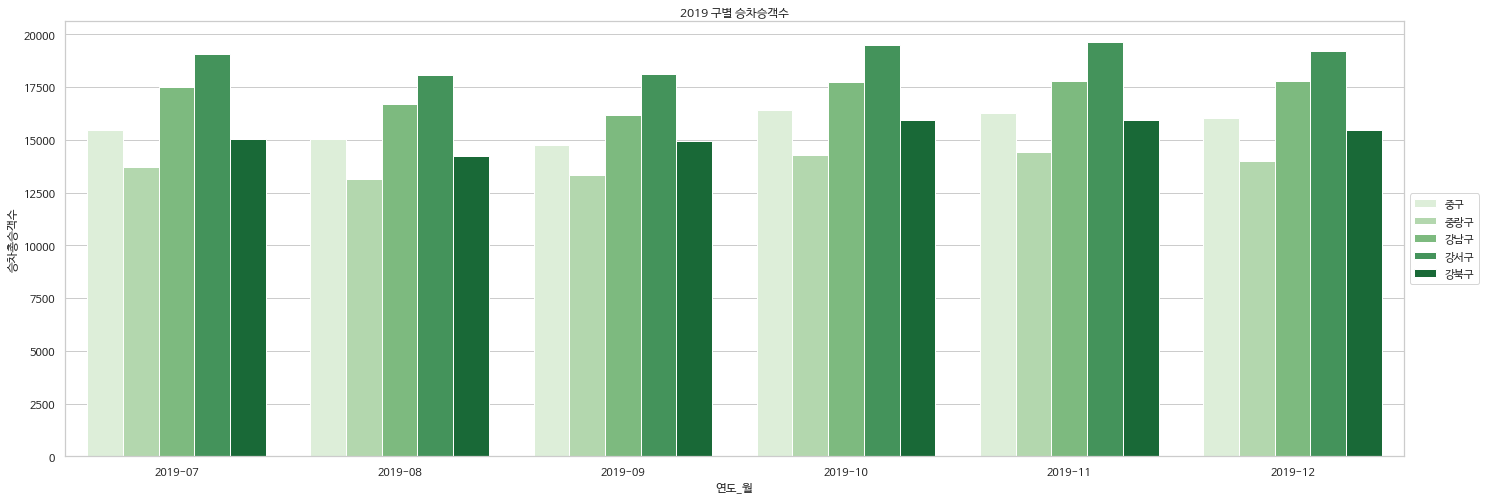

In [151]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="오구", 
    data=df_2019.sort_values(['연도_월']),
    palette = 'Greens',
    ci=None
    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2019 구별 승차승객수")
plt.savefig('/content/data/2019_다섯구별승차자_막대그래프.png',dpi=100)
plt.show()

In [149]:
# # 기본 violinplot 그리기
# sns.violinplot(x=df_2019["승차총승객수"])
# plt.show()

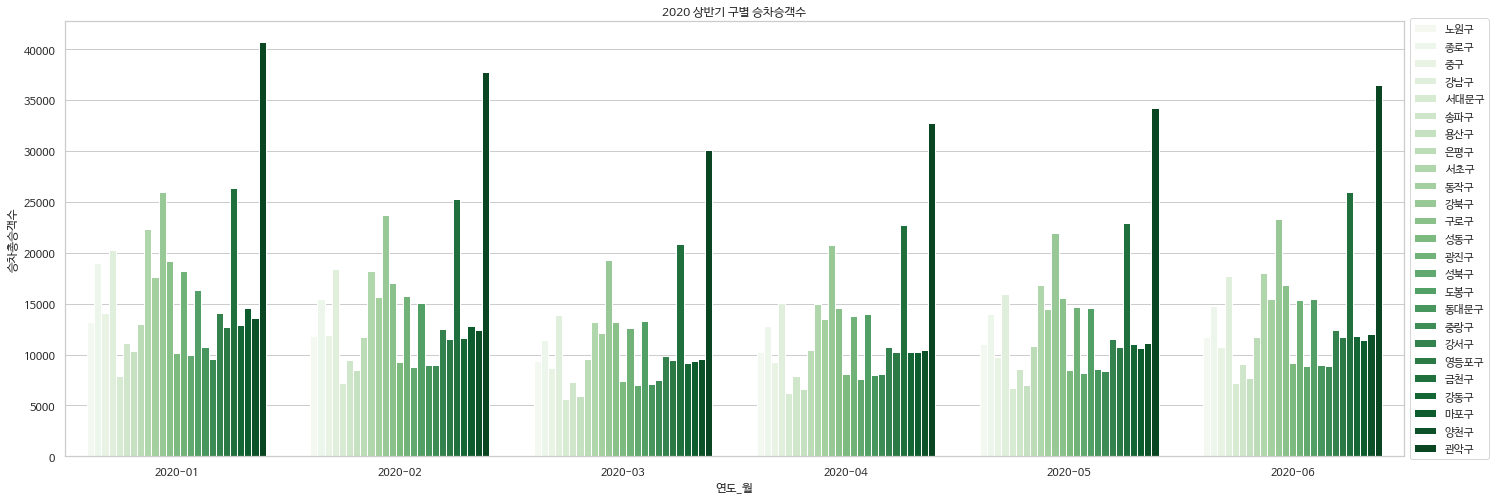

In [108]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="구", 
    data=df_2020_ss.sort_values(['연도_월']),
    # palette = 'Set1_r',
    palette='Greens',
    ci=None #error bar 삭제
    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2020 상반기 구별 승차승객수")
plt.savefig('/content/data/2020상반기구별승차자_막대그래프.png',dpi=100)
plt.show()

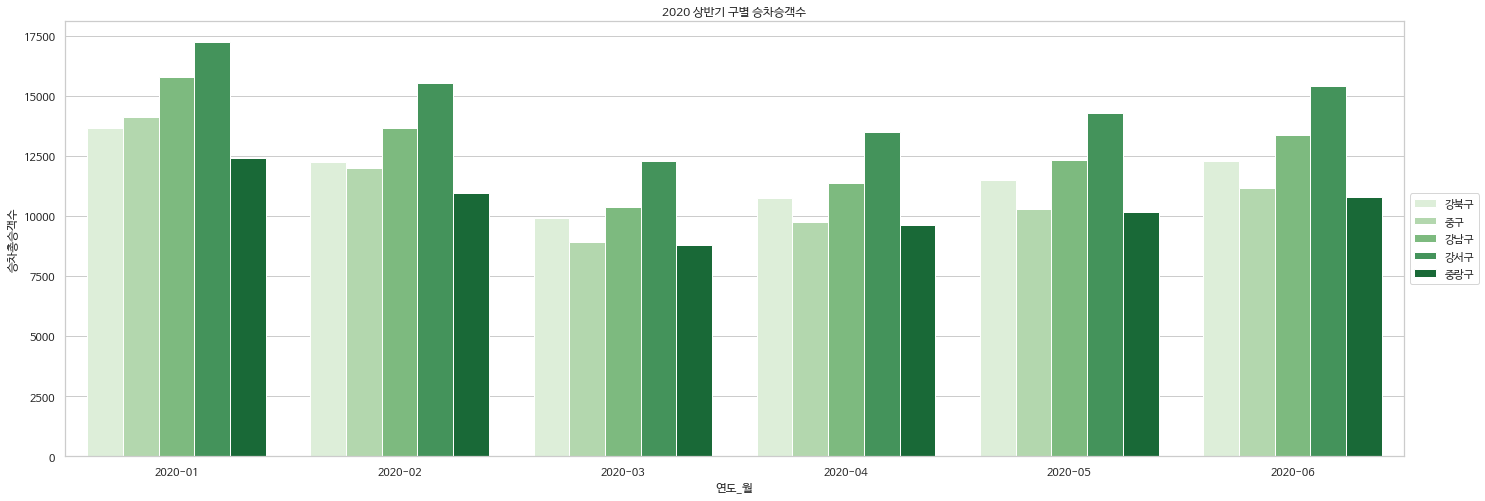

In [152]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="오구", 
    data=df_2020_ss.sort_values(['연도_월']),
    # palette = 'Set1_r',
    palette='Greens',
    ci=None #error bar 삭제
    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2020 상반기 구별 승차승객수")
plt.savefig('/content/data/2020상반기_다섯구별승차자_막대그래프.png',dpi=100)
plt.show()

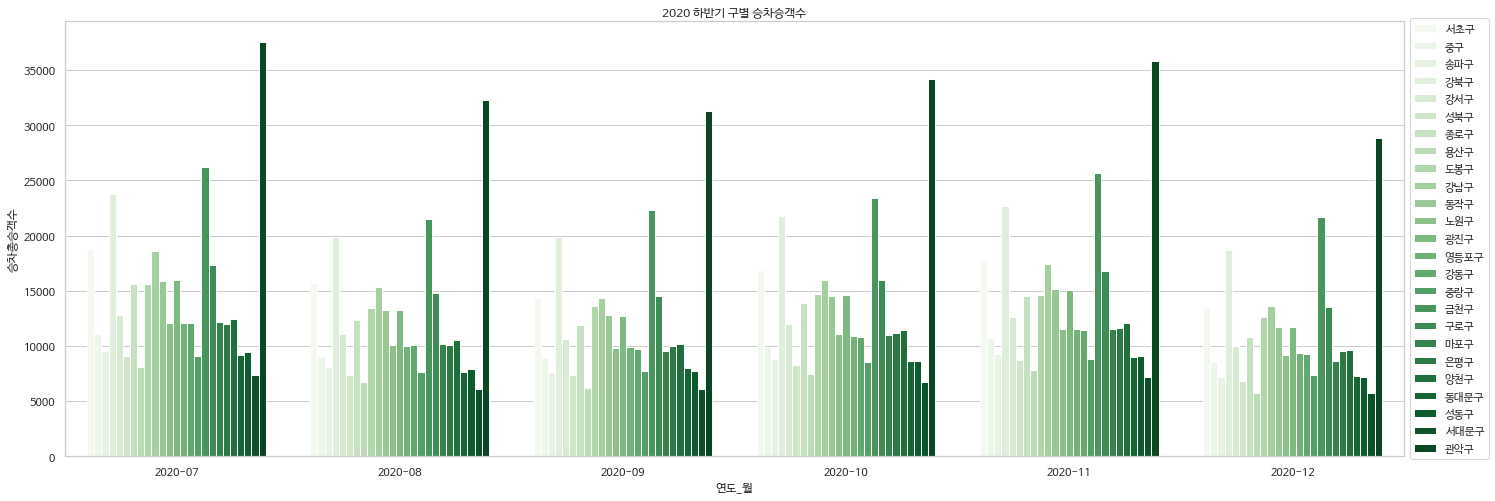

In [109]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="구", 
    data=df_2020_fw.sort_values(['연도_월']),
    # palette = 'brg_r',
    palette='Greens',

    ci=None
    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2020 하반기 구별 승차승객수")
plt.savefig('/content/data/2020하반기구별승차자_막대그래프.png',dpi=100)
plt.show()

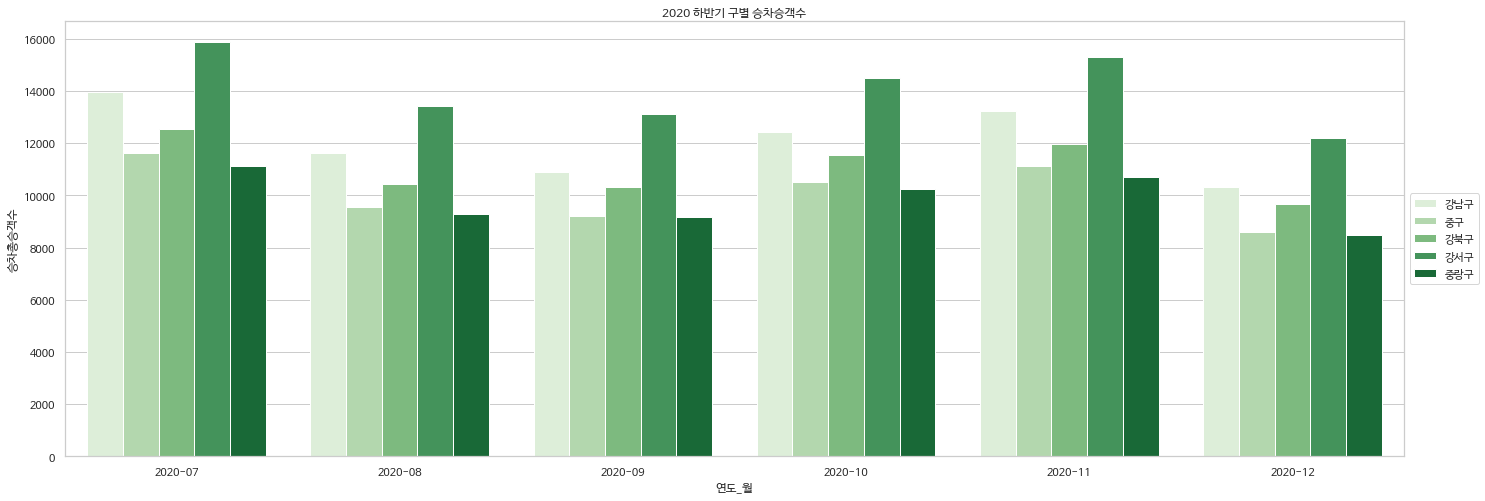

In [153]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="오구", 
    data=df_2020_fw.sort_values(['연도_월']),
    # palette = 'brg_r',
    palette='Greens',

    ci=None
    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2020 하반기 구별 승차승객수")
plt.savefig('/content/data/2020하반기_다섯구별승차자_막대그래프.png',dpi=100)
plt.show()

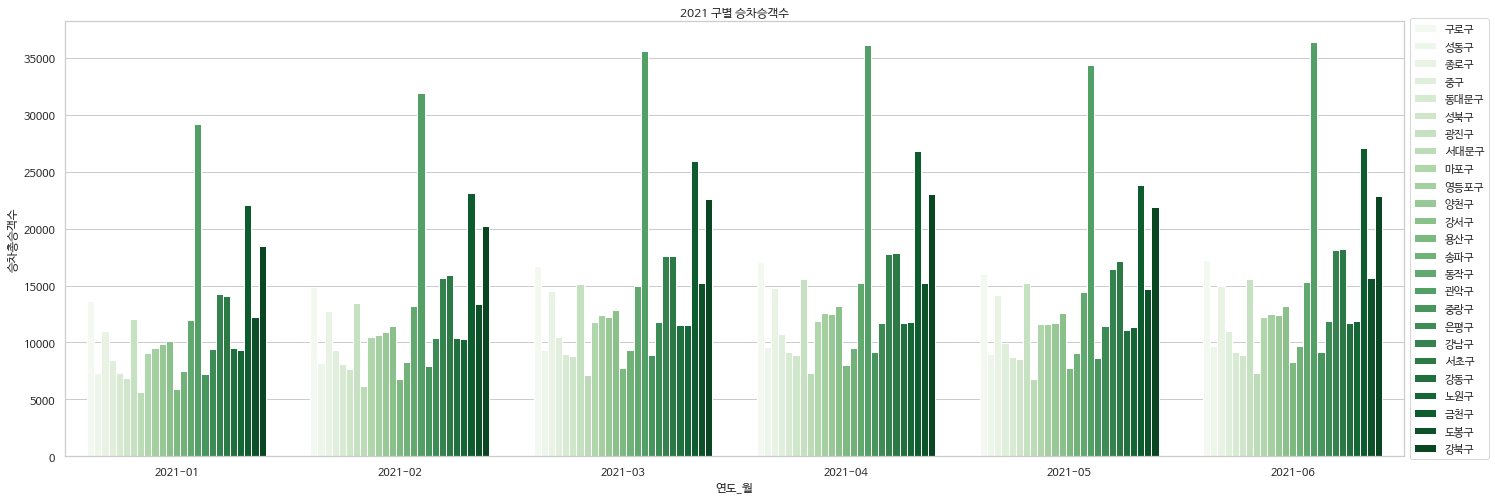

In [110]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="구", 
    data=df_2021.sort_values(['연도_월']),
    ci=None,
    # palette = 'cool_r'
    palette='Greens'

    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2021 구별 승차승객수")
plt.savefig('/content/data/2021구별승차자_막대그래프.png',dpi=100)
plt.show()

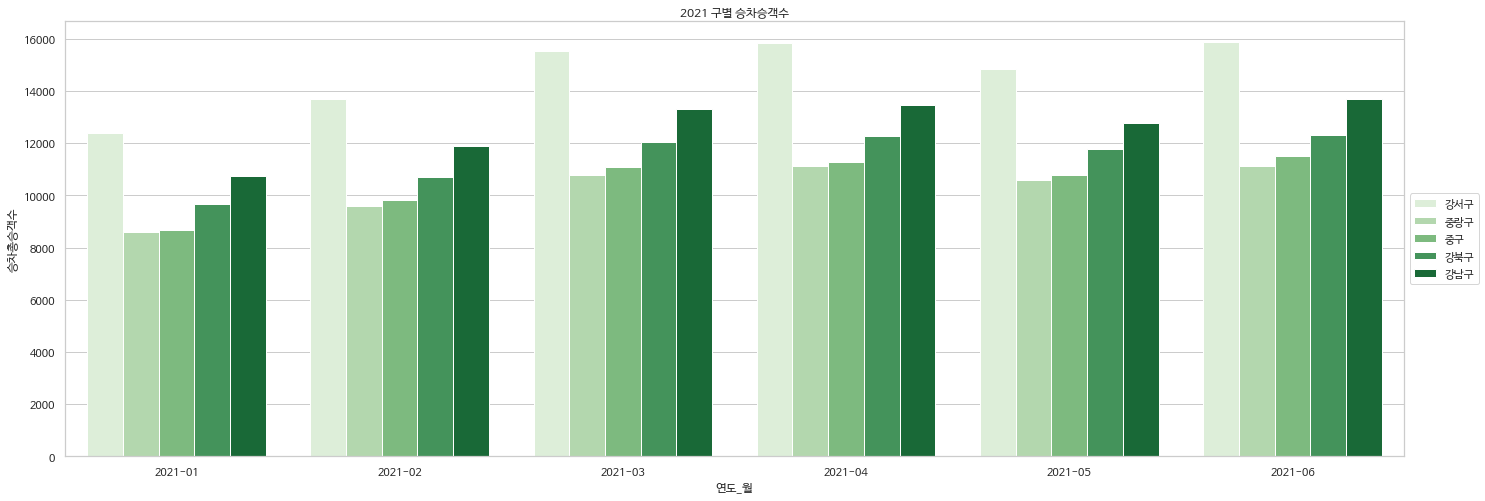

In [154]:
sns.set(font="NanumBarunGothic", 
        # rc={"axes.unicode_minus":False},
        style='whitegrid')
plt.figure(figsize=(24,8))
sns.barplot(
    x="연도_월", 
    y='승차총승객수', 
    hue="오구", 
    data=df_2021.sort_values(['연도_월']),
    ci=None,
    # palette = 'cool_r'
    palette='Greens'

    )
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title("2021 구별 승차승객수")
plt.savefig('/content/data/2021_다섯구별승차자_막대그래프.png',dpi=100)
plt.show()

## 상관관계 구하기

In [111]:
# 그냥 pivot으로 하면 여러 지역이 구로 묶일때 계산이 안되서 안됨 . 
#pivot_table로 합산, 평균으로 나타낼 수 있음.
# aggfunc=np.mean :평균
# aggfunc=np.sum : 
df_2019_all = pd.pivot_table(df_2019,index='사용일자',columns='구',values='승차총승객수',aggfunc=np.sum)
df_2019_all

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
사용일자,,,,,,,,,,,,,,,,,,,,,,,,,
2019-07-01,649950,210084,92990,202000,195256,315974,235371,71476,283779,86649,136750,312189,454125,69540,461923,238132,135241,521695,81426,293942,211717,279846,544393,792551,104938
2019-07-02,671044,216737,94020,205202,198507,321802,239204,72548,289139,88172,137970,322255,467683,72438,466271,247760,138551,559191,83487,299879,213653,286349,558639,808366,106736
2019-07-03,682624,218406,94550,206738,201213,323399,238879,72087,291943,88744,138281,326696,474089,75606,466336,249537,140535,559611,84587,302212,219865,289958,603545,818970,107537
2019-07-04,691781,218430,94268,209383,201001,328766,240294,71881,291865,88484,138258,329030,480624,71467,477670,248672,141303,566450,84020,299540,223000,289218,585166,817912,107539
2019-07-05,708645,226882,98737,217492,209604,346591,246109,72073,301659,91430,144412,343826,507877,74223,522721,256051,143705,603311,86778,307887,242721,298566,597660,855848,109965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,700907,228900,98835,213933,206840,347173,240579,68616,300257,89515,150617,348092,518215,73317,524442,257017,142281,591935,86716,293947,250186,294626,619219,890446,110153
2019-12-28,459112,170569,76961,157617,159026,289735,175340,25317,227495,71420,126039,272254,425451,49516,410406,174254,105208,465892,61683,181077,199675,218219,558392,658340,82885
2019-12-29,301133,123330,55923,115566,115085,218139,136000,19007,165366,53561,90530,185404,320078,32220,305527,124118,75177,367611,41953,133457,157355,155229,351676,465208,59379


In [112]:
df_2020_ss_all = pd.pivot_table(df_2020_ss,index='사용일자',columns='구',values='승차총승객수',aggfunc=np.sum)

In [113]:
df_2020_fw_all = pd.pivot_table(df_2020_fw,index='사용일자',columns='구',values='승차총승객수',aggfunc=np.sum)

In [114]:
df_2021_all = pd.pivot_table(df_2021,index='사용일자',columns='구',values='승차총승객수',aggfunc=np.sum)

In [115]:
# 있으면 안되지만 혹시 넌 값이 있으면 0으로 채워주고 연도,월 컬럼 추가함

df_2019_all = df_2019_all.fillna(0)
df_2019_all = df_2019_all.reset_index()
df_2019_all['연도'] = df_2019_all['사용일자'].str.split('-', expand=True)[0]
df_2019_all['월'] = df_2019_all['사용일자'].str.split('-', expand=True)[1]
df_2019_all = df_2019_all.reset_index()
df_2019_all

구,index,사용일자,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,연도,월
0,0,2019-07-01,649950,210084,92990,202000,195256,315974,235371,71476,283779,86649,136750,312189,454125,69540,461923,238132,135241,521695,81426,293942,211717,279846,544393,792551,104938,2019,07
1,1,2019-07-02,671044,216737,94020,205202,198507,321802,239204,72548,289139,88172,137970,322255,467683,72438,466271,247760,138551,559191,83487,299879,213653,286349,558639,808366,106736,2019,07
2,2,2019-07-03,682624,218406,94550,206738,201213,323399,238879,72087,291943,88744,138281,326696,474089,75606,466336,249537,140535,559611,84587,302212,219865,289958,603545,818970,107537,2019,07
3,3,2019-07-04,691781,218430,94268,209383,201001,328766,240294,71881,291865,88484,138258,329030,480624,71467,477670,248672,141303,566450,84020,299540,223000,289218,585166,817912,107539,2019,07
4,4,2019-07-05,708645,226882,98737,217492,209604,346591,246109,72073,301659,91430,144412,343826,507877,74223,522721,256051,143705,603311,86778,307887,242721,298566,597660,855848,109965,2019,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,179,2019-12-27,700907,228900,98835,213933,206840,347173,240579,68616,300257,89515,150617,348092,518215,73317,524442,257017,142281,591935,86716,293947,250186,294626,619219,890446,110153,2019,12
180,180,2019-12-28,459112,170569,76961,157617,159026,289735,175340,25317,227495,71420,126039,272254,425451,49516,410406,174254,105208,465892,61683,181077,199675,218219,558392,658340,82885,2019,12
181,181,2019-12-29,301133,123330,55923,115566,115085,218139,136000,19007,165366,53561,90530,185404,320078,32220,305527,124118,75177,367611,41953,133457,157355,155229,351676,465208,59379,2019,12
182,182,2019-12-30,660877,216475,95085,200142,190918,324672,228058,64462,283455,84983,136733,311298,485245,67111,474831,237841,133602,584361,82167,279862,223236,277456,582817,849114,104239,2019,12


In [116]:
df_2020_ss_all = df_2020_ss_all.fillna(0)
df_2020_ss_all = df_2020_ss_all.reset_index()
df_2020_ss_all['연도'] = df_2020_ss_all['사용일자'].str.split('-', expand=True)[0]
df_2020_ss_all['월'] = df_2020_ss_all['사용일자'].str.split('-', expand=True)[1]
df_2020_ss_all = df_2020_ss_all.reset_index()
# df_2020_ss_all

In [117]:
df_2020_fw_all = df_2020_fw_all.fillna(0)
df_2020_fw_all = df_2020_fw_all.reset_index()
df_2020_fw_all['연도'] = df_2020_fw_all['사용일자'].str.split('-', expand=True)[0]
df_2020_fw_all['월'] = df_2020_fw_all['사용일자'].str.split('-', expand=True)[1]
df_2020_fw_all = df_2020_fw_all.reset_index()
# df_2020_fw_all

In [118]:
df_2021_all = df_2021_all.fillna(0)
df_2021_all = df_2021_all.reset_index()
df_2021_all['연도'] = df_2021_all['사용일자'].str.split('-', expand=True)[0]
df_2021_all['월'] = df_2021_all['사용일자'].str.split('-', expand=True)[1]
df_2021_all = df_2021_all.reset_index()
# df_2021_all

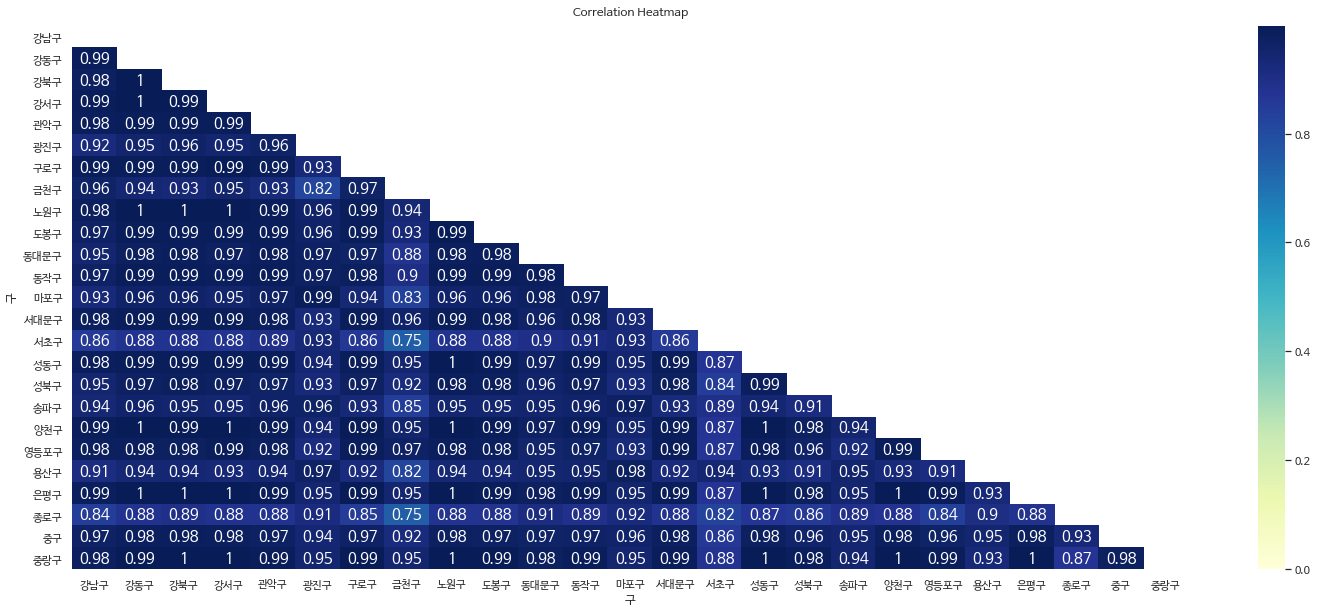

In [119]:
#df_2019_all의 지역별 상관관계로 히트맵제작
# 일반적으로 상관계수 크기가 0.8이상이면 상관성이 있다고 판단한다.
#마스크로 중복된 값을 안보이게 가림
df = df_2019_all[['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(df.corr(), 
            annot=True, 
            # cmap="Blues", 
            cmap='YlGnBu',
            mask = mask,
            vmin=0
            )
ax.set_title('Correlation Heatmap', pad = 10)

#그래프 저장
plt.savefig('/content/data/2019_지하철_구별상관관계.png',dpi=100)

plt.show()

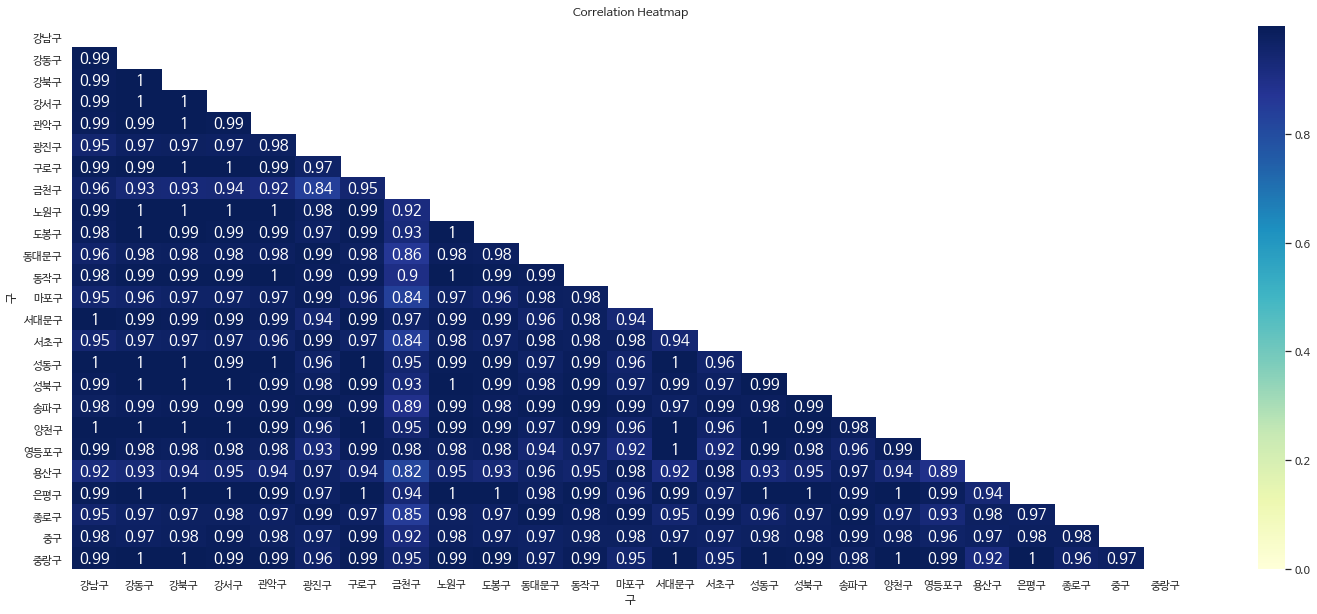

In [120]:
df = df_2020_ss_all[['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구','금천구','노원구','도봉구','동대문구','동작구','마포구','서대문구','서초구','성동구','성북구','송파구','양천구','영등포구','용산구','은평구','종로구','중구','중랑구']]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(df.corr(), 
            annot=True, 
            # cmap="Blues", 
            cmap='YlGnBu',
            mask = mask,
            vmin=0
            )
ax.set_title('Correlation Heatmap', pad = 10)

#그래프 저장
plt.savefig('/content/data/2020상반기_지하철_구별상관관계.png',dpi=100)

plt.show()

## 지도 시각화

In [121]:
import folium
import pandas as pd
import re

In [122]:
geo_json='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [123]:
# 각 기간 지역별 확진자수 합을 구한다.
df_2019_sum = df_2019[['구','승차총승객수']].groupby('구').sum()
df_2019_sum = df_2019_sum.reset_index()
df_2019_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구       25 non-null     object
 1   승차총승객수  25 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [124]:
# 각 기간 지역별 확진자수 합을 구한다.
df_2020_ss_sum = df_2020_ss[['구','승차총승객수']].groupby('구').sum()
df_2020_ss_sum = df_2020_ss_sum.reset_index()
df_2020_ss_sum.sort_values(by=['승차총승객수'], axis=0, ascending=False)
# df_2020_ss_sum.info()

,구,승차총승객수
23,중구,90326289
0,강남구,79786347
17,송파구,67056718
22,종로구,66220527
12,마포구,56580090
14,서초구,56560251
5,광진구,41077436
11,동작구,40400953
8,노원구,36761144
19,영등포구,36301940


In [125]:
# 각 기간 지역별 확진자수 합을 구한다.
df_2020_fw_sum = df_2020_fw[['구','승차총승객수']].groupby('구').sum()
df_2020_fw_sum = df_2020_fw_sum.reset_index()
df_2020_fw.sort_values(by=['승차총승객수'], axis=0, ascending=False)
df_2020_fw_sum

,구,승차총승객수
0,강남구,75974502
1,강동구,27204905
2,강북구,11645678
3,강서구,25497446
4,관악구,24508988
5,광진구,38310871
6,구로구,28502414
7,금천구,8634833
8,노원구,35169673
9,도봉구,11067569


In [126]:
# 각 기간 지역별 확진자수 합을 구한다.
df_2021_sum = df_2021[['구','승차총승객수']].groupby('구').sum()
df_2021_sum = df_2021_sum.reset_index()
df_2021_sum.sort_values(by=['승차총승객수'], axis=0, ascending=False)
df_2021_sum

,구,승차총승객수
0,강남구,78294869
1,강동구,27874337
2,강북구,11696602
3,강서구,26599646
4,관악구,24569950
5,광진구,39428277
6,구로구,28833500
7,금천구,8993576
8,노원구,35940472
9,도봉구,11140011


In [127]:
df_2019_sum.columns = ['name','values']
df_2019_sum = df_2019_sum.sort_values(by='name')

In [128]:
# 컬럼 명을 바꿔준다.
df_2020_ss_sum.columns = ['name','values']
# df_2020_ss_sum = df_2020_ss_sum.sort_values(by='name')

In [129]:
df_2020_fw_sum.columns = ['name','values']
# df_2020_fw_sum = df_2020_fw_sum.sort_values(by='name')

In [130]:
df_2021_sum.columns = ['name','values']
# df_2021_sum = df_2021_sum.sort_values(by='name')

In [131]:
# 줌을 10으로 설정
m = folium.Map(
    location=[37.566345,126.977893],
    tiles='cartodbpositron',
    zoom_start=10
)

#색을 조정할 수 있음

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2019_sum,
    columns=['name','values'],
    key_on='feature.properties.name',
    # fill_color='YlGn',
    # fill_color='BuPu',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2019_구별탑승객수'
).add_to(m)

#저장
m.save('2019_구별탑승객수.html')
m

In [132]:
# 줌을 10으로 설정
m = folium.Map(
    location=[37.566345,126.977893],
    tiles='cartodbpositron',
    zoom_start=10
)

#색을 조정할 수 있음

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2020_ss_sum,
    columns=['name','values'],
    key_on='feature.properties.name',
    # fill_color='YlGn',
    # fill_color='BuPu',
    # fill_color='Set1_r',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2020상반기_구별탑승객수'
).add_to(m)

#저장
m.save('2020상반기_구별탑승객수.html')
m

In [133]:
# 줌을 10으로 설정
m = folium.Map(
    location=[37.566345,126.977893],
    tiles='cartodbpositron',
    zoom_start=10
)

#색을 조정할 수 있음

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2020_fw_sum,
    columns=['name','values'],
    key_on='feature.properties.name',
    # fill_color='YlGn',
    # fill_color='BuPu',
    # fill_color='Oranges_r',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2020하반기_구별탑승객수'
).add_to(m)

#저장
m.save('2020하반기_구별탑승객수.html')
m

In [134]:
# 줌을 10으로 설정
m = folium.Map(
    location=[37.566345,126.977893],
    tiles='cartodbpositron',
    zoom_start=10
)

#색을 조정할 수 있음

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2021_sum,
    columns=['name','values'],
    key_on='feature.properties.name',
    # fill_color='YlGn',
    # fill_color='BuPu',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2021_구별탑승객수'
).add_to(m)

#저장
m.save('2021_구별탑승객수.html')
m

In [135]:
# 줌을 10으로 설정
m = folium.Map(
    location=[37.566345,126.977893],
    tiles='cartodbpositron',
    zoom_start=10
)

#색을 조정할 수 있음

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2020_ss_sum,
    columns=['name','values'],
    key_on='feature.properties.name',
    # fill_color='YlGn',
    # fill_color='BuPu',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2019_구별탑승객수'
).add_to(m)

#저장
# m.save('2019_구별탑승객수.html')
m

In [137]:
# 줌을 10으로 설정
m = folium.Map(
    location=[37.566345,126.977893],
    tiles='Stamen Terrain',
    zoom_start=10
)

#색을 조정할 수 있음

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_2020_fw_sum,
    columns=['구','승차총승객수'],
    key_on='feature.properties.name',
    # fill_color='YlGn',
    # fill_color='BuPu',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='2019_구별탑승객수'
).add_to(m)

#저장
# m.save('2019_구별탑승객수.html')
m

KeyError: ignored